# CAP 6635 (Bayesian Network & Naive Bayes Text Classification, Transfer learning for SMS classification)
## X. Zhu, April 2022.
### Some codes were adopted from following github project.
### Code Credit: https://github.com/hmahajan99/Text-Classification
### Code Credit: https://www.milindsoorya.com/blog/build-a-spam-classifier-in-python

In [556]:
import os
import csv
import string
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import model_selection
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
# A list of common english words which should not affect predictions
stopwords = ['a', 'about', 'above', 'across', 'after', 'afterwards', 'again', 'against', 'all', 'almost', 'alone',
             'along', 'already', 'also', 'although', 'always', 'am', 'among', 'amongst', 'amoungst', 'amount',
             'an', 'and', 'another', 'any', 'anyhow', 'anyone', 'anything', 'anyway', 'anywhere', 'are', 'around',
             'as', 'at', 'back', 'be', 'became', 'because', 'become', 'becomes', 'becoming', 'been', 'before',
             'beforehand', 'behind', 'being', 'below', 'beside', 'besides', 'between', 'beyond', 'bill', 'both',
             'bottom', 'but', 'by', 'call', 'can', 'cannot', 'cant', 'co', 'con', 'could', 'couldnt', 'cry', 'de',
             'describe', 'detail', 'did', 'do', 'does', 'doing', 'don', 'done', 'down', 'due', 'during', 'each', 'eg',
             'eight', 'either', 'eleven', 'else', 'elsewhere', 'empty', 'enough', 'etc', 'even', 'ever', 'every', 'everyone',
             'everything', 'everywhere', 'except', 'few', 'fifteen', 'fify', 'fill', 'find', 'fire', 'first', 'five', 'for',
             'former', 'formerly', 'forty', 'found', 'four', 'from', 'front', 'full', 'further', 'get', 'give', 'go', 'had',
             'has', 'hasnt', 'have', 'having', 'he', 'hence', 'her', 'here', 'hereafter', 'hereby', 'herein', 'hereupon',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'however', 'hundred', 'i', 'ie', 'if', 'in', 'inc', 'indeed',
             'interest', 'into', 'is', 'it', 'its', 'itself', 'just', 'keep', 'last', 'latter', 'latterly', 'least', 'less',
             'ltd', 'made', 'many', 'may', 'me', 'meanwhile', 'might', 'mill', 'mine', 'more', 'moreover', 'most', 'mostly',
             'move', 'much', 'must', 'my', 'myself', 'name', 'namely', 'neither', 'never', 'nevertheless', 'next', 'nine',
             'now', 'nowhere', 'of', 'off', 'often', 'on', 'once', 'one', 'only', 'onto', 'or', 'other', 'others', 'otherwise', 'our', 'ours', 'ourselves', 'out', 'over', 'own',
             'part', 'per', 'perhaps', 'please', 'put', 'rather', 're', 's', 'same', 'see', 'seem', 'seemed', 'seeming',
             'seems', 'serious', 'several', 'she', 'should', 'show', 'side', 'since', 'sincere', 'six', 'sixty', 'so', 
             'some', 'somehow', 'someone', 'something', 'sometime', 'sometimes', 'somewhere', 'still', 'such', 'system',
             't', 'take', 'ten', 'than', 'that', 'the', 'their', 'theirs', 'them', 'themselves', 'then', 'thence', 'there',
             'thereafter', 'thereby', 'therefore', 'therein', 'thereupon', 'these', 'they', 'thickv', 'thin', 'third', 'this',
             'those', 'though', 'three', 'through', 'throughout', 'thru', 'thus', 'to', 'together', 'too', 'top', 'toward',
             'towards', 'twelve', 'twenty', 'two', 'un', 'under', 'until', 'up', 'upon', 'us', 'very', 'via', 'was', 'we',
             'well', 'were', 'what', 'whatever', 'when', 'whence', 'whenever', 'where', 'whereafter', 'whereas', 'whereby',
             'wherein', 'whereupon', 'wherever', 'whether', 'which', 'while', 'whither', 'who', 'whoever', 'whole', 'whom',
             'whose', 'why', 'will', 'with', 'within', 'without', 'would', 'you', 'your', 'yours', 'yourself',
             'yourselves']

In [557]:
X = [] # an element of X is represented as (filename, text)
Y = [] # an element of Y represents the category of the corresponding X element
#root_dir='text'
root_dir='data/email'
for category in os.listdir(root_dir):
    if category == '.DS_Store':
        continue
    for document in os.listdir(root_dir+'/'+category):
        with open(root_dir+'/'+category+'/'+document, "r",encoding='ISO-8859-1') as f:
            X.append((document,f.read()))
            Y.append(category)

print("there are %d messages/files\n %s " % (len(X),X[0:1]))
print("there are %d labels/files\n %s " % (len(Y),Y[0:1]))

there are 250 messages/files
 [('spam121.txt', 'Due to explosive sales in our international business, we are in a position where we need to replenish our inventory. \n\nSpecifically we are looking for Agilent, Hewlett Packard and Tektronix equipment.(We also purchase over 40 other major electronic test equipment manufacturers)\n\nI have a large budget to purchase equipment for this purpose and would like to buy your surplus, excess, under-utilized, off lease, used or any other equipment available. \n\nPlease provide the manufacturer, model number, quantity, general condition and target price and I will respond with an offer right away. \n\nAsk about our trade-in, credit on account or other customized programs to maximize the value of your equipment. \n\n')] 
there are 250 labels/files
 ['spam'] 


In [558]:
# now we are loading a target dataset which is Short messages (SMS). We will try to use previous trained email
# spam filter to classify these short messages.
import csv
X_target = []
Y_target=[]

with open('data/sms.csv',"r",encoding='ISO-8859-1') as f:
    X_target = [line.rstrip() for line in f]

with open('data/labels.csv',"r",encoding='ISO-8859-1') as f:
    Y_target = [line.rstrip() for line in f]

In [559]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=0.25)

In [560]:
len(stopwords)

319

## lowercase, punctuations, and 2000 features

In [561]:
# Count words in original dataset
def count_words(dataset):
    count = 0 
    for i in range(len(dataset)):
        count = count + len(dataset[i][1].split())
    return count

In [562]:
# Create vocabulary (using dictionary)
#topNum specify number of top words. If topNum=0, meaning selecting all words
def createVocabulary(inDataset, stopwordset,topNum):
    vocab = {}
    for i in range(len(inDataset)):
        word_list = []
        for word in inDataset[i][1].split():
            word_new  = word.strip(string.punctuation).lower()
            if (len(word_new)>2):  
                if word_new in vocab:
                    vocab[word_new]+=1
                else:
                    vocab[word_new]=1            
    # sort the dictionary to focus on most frequent words
    vocab_ordered=sorted(vocab.items(), key=lambda x: x[1],reverse=True)
    #import itertools
    if topNum==0:
        return(dict(vocab_ordered))
    elif topNum<len(vocab):
        V_cut=vocab_ordered[0:topNum]
        V_cut=dict(V_cut)
        return(V_cut)      
    return(dict(vocab_ordered))

In [563]:
# To represent training data as bag of words vector representaton (including counts)
def BoWInstances(inDataset,features):
    inDataset_ = np.zeros((len(inDataset),len(features)))
    # This can take some time to complete
    for i in range(len(inDataset)):
        # print(i) # Uncomment to see progress
        word_list = [ word.strip(string.punctuation).lower() for word in inDataset[i][1].split()]
        for word in word_list:
            if word in features:
                inDataset_[i][features.index(word)] += 1
    return(inDataset_)

In [564]:
# To represent training data as bag of words vector representaton (including counts). 
# short messages dataset has different format from the email. So the BoWInstances_sms function needs to be revised.
def BoWInstances_sms(inDataset,features):
    inDataset_ = np.zeros((len(inDataset),len(features)))
    # This can take some time to complete
    for i in range(len(inDataset)):
        # print(i) # Uncomment to see progress
        word_list = [ word.strip(string.punctuation).lower() for word in inDataset[i].split()]
        for word in word_list:
            if word in features:
                inDataset_[i][features.index(word)] += 1
    return(inDataset_)

In [565]:
# Count words in preprocessed dataset
def count_words_preprocessed(dataset):
    count = 0 
    for i in range(len(dataset)):
        count = count + len(dataset[i].split())
    return count

In [566]:
# func process text
def preprocess(dataset):
    final = []
    for i in range(len(dataset)):
        final_words = []
        # Lowercase
        lower = dataset[i][1].lower()
        # Punctuations
        for word in lower.split():
            if word not in string.punctuation:
                final_words.append(word)
            sent = ' '.join(final_words)
        final.append(str(sent))
    return final

In [567]:
# func process text
def preprocess_sms(dataset):
    final = []
    for i in range(len(dataset)):
        final_words = []
        # Lowercase
        lower = dataset[i].lower()
        # Punctuations
        for word in lower.split():
            if word not in string.punctuation:
                final_words.append(word)
            sent = ' '.join(final_words)
        final.append(str(sent))
    return final

In [568]:
# Extract features
V = createVocabulary(X_train,stopwords,2000)
features = list(V.keys())

# Count words
print(f"Number of features: {len(V)}")
print(f"X_train - BEFORE doing preprocess: {count_words(X_train)}")
print(f"X_test - BEFORE doing preprocess: {count_words(X_test)}")
print(f"X_target - BEFORE doing preprocess: {count_words_preprocessed(X_target)}")

# To represent test data as bag of word vector counts
X_train_dataset = BoWInstances(X_train,features)
X_test_dataset = BoWInstances(X_test,features)
X_target_dataset = BoWInstances_sms(X_target,features)


Number of features: 2000
X_train - BEFORE doing preprocess: 23953
X_test - BEFORE doing preprocess: 7212
X_target - BEFORE doing preprocess: 86518


In [569]:
# Count words after removing punctuations and lowercase
print(f"X_train - AFTER doing preprocess: {count_words_preprocessed(preprocess(X_train))}")
print(f"X_test - AFTER doing preprocess: {count_words_preprocessed(preprocess(X_test))}")
print(f"X_target - AFTER doing preprocess: {count_words_preprocessed(preprocess_sms(X_target))}")

X_train - AFTER doing preprocess: 23740
X_test - AFTER doing preprocess: 7175
X_target - AFTER doing preprocess: 85760


In [570]:
#import sklearn packages for different classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import timeit
from sklearn.metrics import confusion_matrix

In [571]:
def train_different_models(report=True):
    mnb = MultinomialNB()
    svc = SVC()
    rfc = RandomForestClassifier()
    knc = KNeighborsClassifier()
    dtc = DecisionTreeClassifier()
    lr = LogisticRegression()
    clfs = {'SVC' : svc, 'MultinomialNB': mnb, 'RandomForest': rfc, 'KNeighbors': knc, 'DecisionTree': dtc, 'LogisticRegression': lr}

    results = []
    for name, model in clfs.items():
        print(f"Name of Classifier: {name}")
        start = timeit.default_timer()
        model.fit(X_train_dataset, Y_train)
        Y_target_pred = model.predict(X_target_dataset)
        stop = timeit.default_timer()
        sklearn_score_train = model.score(X_train_dataset,Y_train)
        sklearn_score_test = model.score(X_test_dataset,Y_test)
        sklearn_score_target = model.score(X_target_dataset,Y_target)
        if report == True:
            print("Sklearn's score on testing data (SMS):",sklearn_score_target)
            conf_mat = confusion_matrix(Y_target, Y_target_pred)
            print(conf_mat)
            print("Classification report for testing data (SMS):")
            print(classification_report(Y_target, Y_target_pred))
        results.append((name,"Score on training data (Email): "+ str(sklearn_score_train), "Score on testing data (Email): " + str(sklearn_score_test), "Score on SMS data: " + str(sklearn_score_target),"Time: " + str(stop - start)))
    return results

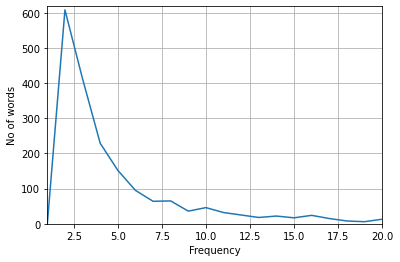

In [572]:
# Graph number of words given frequency (20)
num_words = [0 for i in range(max(V.values())+1)] 
freq = [i for i in range(max(V.values())+1)] 
for key in V:
    num_words[V[key]]+=1
maxv=max(num_words)+10
plt.plot(freq,num_words)
plt.axis([1, 20, 0, maxv])
plt.xlabel("Frequency")
plt.ylabel("No of words")
plt.grid()
plt.show()

In [573]:
# Print result
first_exp = train_different_models()
first_exp

Name of Classifier: SVC
Sklearn's score on testing data (SMS): 0.1349605168700646
[[   5 4820]
 [   0  747]]
Classification report for testing data (SMS):
              precision    recall  f1-score   support

      normal       1.00      0.00      0.00      4825
        spam       0.13      1.00      0.24       747

    accuracy                           0.13      5572
   macro avg       0.57      0.50      0.12      5572
weighted avg       0.88      0.13      0.03      5572

Name of Classifier: MultinomialNB
Sklearn's score on testing data (SMS): 0.4278535534816942
[[1800 3025]
 [ 163  584]]
Classification report for testing data (SMS):
              precision    recall  f1-score   support

      normal       0.92      0.37      0.53      4825
        spam       0.16      0.78      0.27       747

    accuracy                           0.43      5572
   macro avg       0.54      0.58      0.40      5572
weighted avg       0.82      0.43      0.50      5572

Name of Classifier: Random

[('SVC',
  'Score on training data (Email): 0.9625668449197861',
  'Score on testing data (Email): 0.7777777777777778',
  'Score on SMS data: 0.1349605168700646',
  'Time: 0.6961654170008842'),
 ('MultinomialNB',
  'Score on training data (Email): 1.0',
  'Score on testing data (Email): 0.9047619047619048',
  'Score on SMS data: 0.4278535534816942',
  'Time: 0.005753834004281089'),
 ('RandomForest',
  'Score on training data (Email): 1.0',
  'Score on testing data (Email): 0.8571428571428571',
  'Score on SMS data: 0.1354989231873654',
  'Time: 0.19851754198316485'),
 ('KNeighbors',
  'Score on training data (Email): 0.8502673796791443',
  'Score on testing data (Email): 0.6825396825396826',
  'Score on SMS data: 0.13801148600143576',
  'Time: 0.15583012500428595'),
 ('DecisionTree',
  'Score on training data (Email): 1.0',
  'Score on testing data (Email): 0.6349206349206349',
  'Score on SMS data: 0.167264895908112',
  'Time: 0.022000208002282307'),
 ('LogisticRegression',
  'Score o

In [574]:
first_exp = train_different_models(report=False)
first_exp

Name of Classifier: SVC
Name of Classifier: MultinomialNB
Name of Classifier: RandomForest
Name of Classifier: KNeighbors
Name of Classifier: DecisionTree
Name of Classifier: LogisticRegression


[('SVC',
  'Score on training data (Email): 0.9625668449197861',
  'Score on testing data (Email): 0.7777777777777778',
  'Score on SMS data: 0.1349605168700646',
  'Time: 0.6949662919796538'),
 ('MultinomialNB',
  'Score on training data (Email): 1.0',
  'Score on testing data (Email): 0.9047619047619048',
  'Score on SMS data: 0.4278535534816942',
  'Time: 0.005441542016342282'),
 ('RandomForest',
  'Score on training data (Email): 1.0',
  'Score on testing data (Email): 0.8412698412698413',
  'Score on SMS data: 0.1351399856424982',
  'Time: 0.1747678329993505'),
 ('KNeighbors',
  'Score on training data (Email): 0.8502673796791443',
  'Score on testing data (Email): 0.6825396825396826',
  'Score on SMS data: 0.13801148600143576',
  'Time: 0.15924366598483175'),
 ('DecisionTree',
  'Score on training data (Email): 1.0',
  'Score on testing data (Email): 0.6349206349206349',
  'Score on SMS data: 0.16744436468054558',
  'Time: 0.018862875003833324'),
 ('LogisticRegression',
  'Score 

## lowercase, punctuation, stopwords, and 2000 features

In [575]:
# Create vocabulary (using dictionary)
#topNum specify number of top words. If topNum=0, meaning selecting all words
def createVocabulary(inDataset, stopwordset,topNum):
    vocab = {}
    for i in range(len(inDataset)):
        word_list = []
        for word in inDataset[i].split():
            word_new  = word.strip(string.punctuation).lower()
            if (len(word_new)>2)  and (word_new not in stopwordset):  
                if word_new in vocab:
                    vocab[word_new]+=1
                else:
                    vocab[word_new]=1            
    # sort the dictionary to focus on most frequent words
    vocab_ordered=sorted(vocab.items(), key=lambda x: x[1],reverse=True)
    #import itertools
    if topNum==0:
        return(dict(vocab_ordered))
    elif topNum<len(vocab):
        V_cut=vocab_ordered[0:topNum]
        V_cut=dict(V_cut)
        return(V_cut)      
    return(dict(vocab_ordered))

In [576]:
def preprocess(dataset):
    final = []
    for i in range(len(dataset)):
        final_words = []
        # Lowercase
        lower = dataset[i][1].lower()
        # Stopword and punctuations
        for word in lower.split():
            # Below condition is to check for Stop words and consider only alphabets
            if word not in stopwords and word not in string.punctuation:
                final_words.append(word)
        sent = ' '.join(final_words)
        final.append(str(sent))
    return final

In [577]:
def preprocess_sms(dataset):
    final = []
    for i in range(len(dataset)):
        final_words = []
        # Lowercase
        lower = dataset[i].lower()
        # Stopword and punctuations
        for word in lower.split():
            # Below condition is to check for Stop words and consider only alphabets
            if word not in stopwords and word not in string.punctuation:
                final_words.append(word)
        sent = ' '.join(final_words)
        final.append(str(sent))
    return final

In [578]:
# Preprocessing text dataset
X_train_data = preprocess(X_train)
X_test_data = preprocess(X_test)
X_target_data = preprocess_sms(X_target)

In [579]:
# Extract features
V = createVocabulary(X_train_data,stopwords,2000)
features = list(V.keys())

# Count words
print(f"Number of features: {len(V)}")
print(f"X_train - BEFORE doing preprocess: {count_words(X_train)}")
print(f"X_test - BEFORE doing preprocess: {count_words(X_test)}")
print(f"X_target - BEFORE doing preprocess: {count_words_preprocessed(X_target)}")

# To represent test data as bag of word vector counts
X_train_dataset = BoWInstances_sms(X_train_data,features)
X_test_dataset = BoWInstances_sms(X_test_data,features)
X_target_dataset = BoWInstances_sms(X_target_data,features)

Number of features: 2000
X_train - BEFORE doing preprocess: 23953
X_test - BEFORE doing preprocess: 7212
X_target - BEFORE doing preprocess: 86518


In [580]:
# Count words after removing punctuations and stopwords lowercase
print(f"X_train - AFTER doing preprocess: {count_words_preprocessed(preprocess(X_train))}")
print(f"X_test - AFTER doing preprocess: {count_words_preprocessed(preprocess(X_test))}")
print(f"X_target - AFTER doing preprocess: {count_words_preprocessed(preprocess_sms(X_target))}")

X_train - AFTER doing preprocess: 13477
X_test - AFTER doing preprocess: 3950
X_target - AFTER doing preprocess: 51930


In [581]:
# Print result
second_exp = train_different_models()
second_exp

Name of Classifier: SVC
Sklearn's score on testing data (SMS): 0.1354989231873654
[[   8 4817]
 [   0  747]]
Classification report for testing data (SMS):
              precision    recall  f1-score   support

      normal       1.00      0.00      0.00      4825
        spam       0.13      1.00      0.24       747

    accuracy                           0.14      5572
   macro avg       0.57      0.50      0.12      5572
weighted avg       0.88      0.14      0.03      5572

Name of Classifier: MultinomialNB
Sklearn's score on testing data (SMS): 0.41762383345297915
[[1800 3025]
 [ 220  527]]
Classification report for testing data (SMS):
              precision    recall  f1-score   support

      normal       0.89      0.37      0.53      4825
        spam       0.15      0.71      0.25       747

    accuracy                           0.42      5572
   macro avg       0.52      0.54      0.39      5572
weighted avg       0.79      0.42      0.49      5572

Name of Classifier: Rando

[('SVC',
  'Score on training data (Email): 0.9946524064171123',
  'Score on testing data (Email): 0.7777777777777778',
  'Score on SMS data: 0.1354989231873654',
  'Time: 0.743085833004443'),
 ('MultinomialNB',
  'Score on training data (Email): 1.0',
  'Score on testing data (Email): 0.8888888888888888',
  'Score on SMS data: 0.41762383345297915',
  'Time: 0.005987790995277464'),
 ('RandomForest',
  'Score on training data (Email): 1.0',
  'Score on testing data (Email): 0.7936507936507936',
  'Score on SMS data: 0.1358578607322326',
  'Time: 0.2157311250048224'),
 ('KNeighbors',
  'Score on training data (Email): 0.786096256684492',
  'Score on testing data (Email): 0.5079365079365079',
  'Score on SMS data: 0.13819095477386933',
  'Time: 0.15736033400753513'),
 ('DecisionTree',
  'Score on training data (Email): 1.0',
  'Score on testing data (Email): 0.7936507936507936',
  'Score on SMS data: 0.14680545585068197',
  'Time: 0.020703499991213903'),
 ('LogisticRegression',
  'Score o

In [582]:
second_exp = train_different_models(report=False)
second_exp

Name of Classifier: SVC
Name of Classifier: MultinomialNB
Name of Classifier: RandomForest
Name of Classifier: KNeighbors
Name of Classifier: DecisionTree
Name of Classifier: LogisticRegression


[('SVC',
  'Score on training data (Email): 0.9946524064171123',
  'Score on testing data (Email): 0.7777777777777778',
  'Score on SMS data: 0.1354989231873654',
  'Time: 0.7347576669999398'),
 ('MultinomialNB',
  'Score on training data (Email): 1.0',
  'Score on testing data (Email): 0.8888888888888888',
  'Score on SMS data: 0.41762383345297915',
  'Time: 0.005686624994268641'),
 ('RandomForest',
  'Score on training data (Email): 1.0',
  'Score on testing data (Email): 0.873015873015873',
  'Score on SMS data: 0.13657573582196697',
  'Time: 0.2197622919920832'),
 ('KNeighbors',
  'Score on training data (Email): 0.786096256684492',
  'Score on testing data (Email): 0.5079365079365079',
  'Score on SMS data: 0.13819095477386933',
  'Time: 0.14701270899968222'),
 ('DecisionTree',
  'Score on training data (Email): 1.0',
  'Score on testing data (Email): 0.7936507936507936',
  'Score on SMS data: 0.1466259870782484',
  'Time: 0.0190007500059437'),
 ('LogisticRegression',
  'Score on 

### lowercase, stopwords, punctuations, word lemmatizer, and 2000 features

In [583]:
import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from collections import defaultdict

tag_map = defaultdict(lambda : wordnet.NOUN)
tag_map['J'] = wordnet.ADJ
tag_map['V'] = wordnet.VERB
tag_map['R'] = wordnet.ADV

In [584]:
# Create vocabulary (using dictionary)
#topNum specify number of top words. If topNum=0, meaning selecting all words
def createVocabulary(inDataset, stopwordset,topNum):
    vocab = {}
    for i in range(len(inDataset)):
        word_list = []
        #for word in inDataset[i][1].split():
        for word in inDataset[i].split():
            word_new  = word.strip(string.punctuation).lower()
            if (len(word_new)>2)  and (word_new not in stopwordset):  
            #if (len(word_new)>2):  
                if word_new in vocab:
                    vocab[word_new]+=1
                else:
                    vocab[word_new]=1            
    # sort the dictionary to focus on most frequent words
    vocab_ordered=sorted(vocab.items(), key=lambda x: x[1],reverse=True)
    #import itertools
    if topNum==0:
        return(dict(vocab_ordered))
    elif topNum<len(vocab):
        V_cut=vocab_ordered[0:topNum]
        V_cut=dict(V_cut)
        return(V_cut)      
    return(dict(vocab_ordered))

In [585]:
def preprocess(dataset):
    final = []
    for i in range(len(dataset)):
        final_words = []
        # Lowercase
        lower = dataset[i][1].lower()
        # Tokenize word
        tokenize = word_tokenize(lower)
        # Initializing WordNetLemmatizer() 
        word_Lemmatized = WordNetLemmatizer()
        # pos_tag function below will provide the 'tag' i.e if the word is Noun(N) or Verb(V) or something else.
        for word, tag in pos_tag(tokenize):
            # Below condition is to check for Stop words and consider only alphabets
            if word not in stopwords and word not in string.punctuation:
                word_Final = word_Lemmatized.lemmatize(word,tag_map[str(tag[0])])
                final_words.append(word_Final)
                #final_words.append(word)
        sent = ' '.join(final_words)
        final.append(str(sent))
    return final

In [586]:
def preprocess_sms(dataset):
    final = []
    for i in range(len(dataset)):
        final_words = []
        # Lowercase
        lower = dataset[i].lower()
        # Tokenize word
        tokenize = word_tokenize(lower)
        # Initializing WordNetLemmatizer() 
        word_Lemmatized = WordNetLemmatizer()
        # pos_tag function below will provide the 'tag' i.e if the word is Noun(N) or Verb(V) or something else.
        for word, tag in pos_tag(tokenize):
            # Below condition is to check for Stop words and consider only alphabets
            if word not in stopwords and word not in string.punctuation:
                word_Final = word_Lemmatized.lemmatize(word,tag_map[str(tag[0])])
                final_words.append(word_Final)
                #final_words.append(word)
        sent = ' '.join(final_words)
        final.append(str(sent))
    return final

In [587]:
# Preprocessing text dataset
X_train_data = preprocess(X_train)
X_test_data = preprocess(X_test)
X_target_data = preprocess_sms(X_target)

In [588]:
# Extract features
V = createVocabulary(X_train_data,stopwords,2000)
features = list(V.keys())

# Count words
print(f"Number of features: {len(V)}")
print(f"X_train - BEFORE doing preprocess: {count_words(X_train)}")
print(f"X_test - BEFORE doing preprocess: {count_words(X_test)}")
print(f"X_target - BEFORE doing preprocess: {count_words_preprocessed(X_target)}")

# To represent test data as bag of word vector counts
X_train_dataset = BoWInstances_sms(X_train_data,features)
X_test_dataset = BoWInstances_sms(X_test_data,features)
X_target_dataset = BoWInstances_sms(X_target_data,features)

Number of features: 2000
X_train - BEFORE doing preprocess: 23953
X_test - BEFORE doing preprocess: 7212
X_target - BEFORE doing preprocess: 86518


In [589]:
# Count words after removing punctuations and stopwords lowercase
print(f"X_train - AFTER doing preprocess: {count_words_preprocessed(preprocess(X_train))}")
print(f"X_test - AFTER doing preprocess: {count_words_preprocessed(preprocess(X_test))}")
print(f"X_target - AFTER doing preprocess: {count_words_preprocessed(preprocess_sms(X_target))}")

X_train - AFTER doing preprocess: 13469
X_test - AFTER doing preprocess: 3954
X_target - AFTER doing preprocess: 55200


In [590]:
# Print result
third_exp = train_different_models()
third_exp

Name of Classifier: SVC
Sklearn's score on testing data (SMS): 0.1354989231873654
[[  10 4815]
 [   2  745]]
Classification report for testing data (SMS):
              precision    recall  f1-score   support

      normal       0.83      0.00      0.00      4825
        spam       0.13      1.00      0.24       747

    accuracy                           0.14      5572
   macro avg       0.48      0.50      0.12      5572
weighted avg       0.74      0.14      0.04      5572

Name of Classifier: MultinomialNB
Sklearn's score on testing data (SMS): 0.4016511127063891
[[1710 3115]
 [ 219  528]]
Classification report for testing data (SMS):
              precision    recall  f1-score   support

      normal       0.89      0.35      0.51      4825
        spam       0.14      0.71      0.24       747

    accuracy                           0.40      5572
   macro avg       0.52      0.53      0.37      5572
weighted avg       0.79      0.40      0.47      5572

Name of Classifier: Random

[('SVC',
  'Score on training data (Email): 0.9946524064171123',
  'Score on testing data (Email): 0.8095238095238095',
  'Score on SMS data: 0.1354989231873654',
  'Time: 0.7231568330025766'),
 ('MultinomialNB',
  'Score on training data (Email): 1.0',
  'Score on testing data (Email): 0.9047619047619048',
  'Score on SMS data: 0.4016511127063891',
  'Time: 0.005478292005136609'),
 ('RandomForest',
  'Score on training data (Email): 1.0',
  'Score on testing data (Email): 0.873015873015873',
  'Score on SMS data: 0.13801148600143576',
  'Time: 0.19890662500984035'),
 ('KNeighbors',
  'Score on training data (Email): 0.7700534759358288',
  'Score on testing data (Email): 0.6031746031746031',
  'Score on SMS data: 0.1342426417803302',
  'Time: 0.15696662501432002'),
 ('DecisionTree',
  'Score on training data (Email): 1.0',
  'Score on testing data (Email): 0.7142857142857143',
  'Score on SMS data: 0.15990667623833452',
  'Time: 0.01930233300663531'),
 ('LogisticRegression',
  'Score o

In [591]:
third_exp = train_different_models(report=False)
third_exp

Name of Classifier: SVC
Name of Classifier: MultinomialNB
Name of Classifier: RandomForest
Name of Classifier: KNeighbors
Name of Classifier: DecisionTree
Name of Classifier: LogisticRegression


[('SVC',
  'Score on training data (Email): 0.9946524064171123',
  'Score on testing data (Email): 0.8095238095238095',
  'Score on SMS data: 0.1354989231873654',
  'Time: 0.7408179589838255'),
 ('MultinomialNB',
  'Score on training data (Email): 1.0',
  'Score on testing data (Email): 0.9047619047619048',
  'Score on SMS data: 0.4016511127063891',
  'Time: 0.005927166988840327'),
 ('RandomForest',
  'Score on training data (Email): 1.0',
  'Score on testing data (Email): 0.8253968253968254',
  'Score on SMS data: 0.13603732950466618',
  'Time: 0.1908640000037849'),
 ('KNeighbors',
  'Score on training data (Email): 0.7700534759358288',
  'Score on testing data (Email): 0.6031746031746031',
  'Score on SMS data: 0.1342426417803302',
  'Time: 0.1482987079943996'),
 ('DecisionTree',
  'Score on training data (Email): 1.0',
  'Score on testing data (Email): 0.7936507936507936',
  'Score on SMS data: 0.14913854989231873',
  'Time: 0.01905120801529847'),
 ('LogisticRegression',
  'Score on

### lowercase, stopwords, punctuations, word lemmatizer, and all features from training set

In [592]:
# Extract features
V1 = createVocabulary(X_train_data,stopwords,0)
features1 = list(V1.keys())

# Count words
print(f"Number of features: {len(V1)}")
print(f"X_train - BEFORE doing preprocess: {count_words(X_train)}")
print(f"X_test - BEFORE doing preprocess: {count_words(X_test)}")
print(f"X_target - BEFORE doing preprocess: {count_words_preprocessed(X_target)}")

# To represent test data as bag of word vector counts
X_train_dataset = BoWInstances_sms(X_train_data,features1)
X_test_dataset = BoWInstances_sms(X_test_data,features1)
X_target_dataset = BoWInstances_sms(X_target_data,features1)

Number of features: 3620
X_train - BEFORE doing preprocess: 23953
X_test - BEFORE doing preprocess: 7212
X_target - BEFORE doing preprocess: 86518


In [593]:
# Count words after removing punctuations and stopwords lowercase
print(f"X_train - AFTER doing preprocess: {count_words_preprocessed(preprocess(X_train))}")
print(f"X_test - AFTER doing preprocess: {count_words_preprocessed(preprocess(X_test))}")
print(f"X_target - AFTER doing preprocess: {count_words_preprocessed(preprocess_sms(X_target))}")

X_train - AFTER doing preprocess: 13469
X_test - AFTER doing preprocess: 3954
X_target - AFTER doing preprocess: 55200


In [594]:
# Print result
fourth_exp = train_different_models()
fourth_exp

Name of Classifier: SVC
Sklearn's score on testing data (SMS): 0.1349605168700646
[[   7 4818]
 [   2  745]]
Classification report for testing data (SMS):
              precision    recall  f1-score   support

      normal       0.78      0.00      0.00      4825
        spam       0.13      1.00      0.24       747

    accuracy                           0.13      5572
   macro avg       0.46      0.50      0.12      5572
weighted avg       0.69      0.13      0.03      5572

Name of Classifier: MultinomialNB
Sklearn's score on testing data (SMS): 0.41511127063890885
[[1773 3052]
 [ 207  540]]
Classification report for testing data (SMS):
              precision    recall  f1-score   support

      normal       0.90      0.37      0.52      4825
        spam       0.15      0.72      0.25       747

    accuracy                           0.42      5572
   macro avg       0.52      0.55      0.38      5572
weighted avg       0.80      0.42      0.48      5572

Name of Classifier: Rando

[('SVC',
  'Score on training data (Email): 0.9946524064171123',
  'Score on testing data (Email): 0.8095238095238095',
  'Score on SMS data: 0.1349605168700646',
  'Time: 1.3346639999945182'),
 ('MultinomialNB',
  'Score on training data (Email): 1.0',
  'Score on testing data (Email): 0.9047619047619048',
  'Score on SMS data: 0.41511127063890885',
  'Time: 0.0087964580161497'),
 ('RandomForest',
  'Score on training data (Email): 1.0',
  'Score on testing data (Email): 0.8253968253968254',
  'Score on SMS data: 0.1351399856424982',
  'Time: 0.23678124998696148'),
 ('KNeighbors',
  'Score on training data (Email): 0.9197860962566845',
  'Score on testing data (Email): 0.6825396825396826',
  'Score on SMS data: 0.15254845656855706',
  'Time: 0.20279358301195316'),
 ('DecisionTree',
  'Score on training data (Email): 1.0',
  'Score on testing data (Email): 0.8095238095238095',
  'Score on SMS data: 0.14913854989231873',
  'Time: 0.031573915999615565'),
 ('LogisticRegression',
  'Score 

In [595]:
fourth_exp = train_different_models(report=False)
fourth_exp

Name of Classifier: SVC
Name of Classifier: MultinomialNB
Name of Classifier: RandomForest
Name of Classifier: KNeighbors
Name of Classifier: DecisionTree
Name of Classifier: LogisticRegression


[('SVC',
  'Score on training data (Email): 0.9946524064171123',
  'Score on testing data (Email): 0.8095238095238095',
  'Score on SMS data: 0.1349605168700646',
  'Time: 1.2730588330014143'),
 ('MultinomialNB',
  'Score on training data (Email): 1.0',
  'Score on testing data (Email): 0.9047619047619048',
  'Score on SMS data: 0.41511127063890885',
  'Time: 0.009518999984720722'),
 ('RandomForest',
  'Score on training data (Email): 1.0',
  'Score on testing data (Email): 0.7777777777777778',
  'Score on SMS data: 0.13442211055276382',
  'Time: 0.2526372499996796'),
 ('KNeighbors',
  'Score on training data (Email): 0.9197860962566845',
  'Score on testing data (Email): 0.6825396825396826',
  'Score on SMS data: 0.15254845656855706',
  'Time: 0.23428912498638965'),
 ('DecisionTree',
  'Score on training data (Email): 1.0',
  'Score on testing data (Email): 0.7936507936507936',
  'Score on SMS data: 0.14842067480258436',
  'Time: 0.03135800000745803'),
 ('LogisticRegression',
  'Score

### lowercase, stopwords, punctuations, word stemming, and 2000 features

In [596]:
from nltk.stem import PorterStemmer

In [597]:
def preprocess(dataset):
    final = []
    for i in range(len(dataset)):
        final_words = []
        # Lowercase
        lower = dataset[i][1].lower()
        # Tokenize word
        tokenize = word_tokenize(lower)
        # Initializing WordNetLemmatizer() 
        stemmer = PorterStemmer()
        # pos_tag function below will provide the 'tag' i.e if the word is Noun(N) or Verb(V) or something else.
        for word, tag in pos_tag(tokenize):
            # Below condition is to check for Stop words and consider only alphabets
            if word not in stopwords and word not in string.punctuation:
                word_Final = stemmer.stem(word)
                final_words.append(word_Final)
        sent = ' '.join(final_words)
        final.append(str(sent))
    return final

In [598]:
def preprocess_sms(dataset):
    final = []
    for i in range(len(dataset)):
        final_words = []
        # Lowercase
        lower = dataset[i].lower()
        # Tokenize word
        tokenize = word_tokenize(lower)
        # Initializing WordNetLemmatizer() 
        stemmer = PorterStemmer()
        # pos_tag function below will provide the 'tag' i.e if the word is Noun(N) or Verb(V) or something else.
        for word, tag in pos_tag(tokenize):
            # Below condition is to check for Stop words and consider only alphabets
            if word not in stopwords and word not in string.punctuation:
                word_Final = stemmer.stem(word)
                final_words.append(word_Final)
        sent = ' '.join(final_words)
        final.append(str(sent))
    return final

In [599]:
# Preprocessing text dataset
X_train_data = preprocess(X_train)
X_test_data = preprocess(X_test)
X_target_data = preprocess_sms(X_target)

In [600]:
# Extract features
V = createVocabulary(X_train_data,stopwords,2000)
features = list(V.keys())

# Count words
print(f"Number of features: {len(V)}")
print(f"X_train - BEFORE doing preprocess: {count_words(X_train)}")
print(f"X_test - BEFORE doing preprocess: {count_words(X_test)}")
print(f"X_target - BEFORE doing preprocess: {count_words_preprocessed(X_target)}")

# To represent test data as bag of word vector counts
X_train_dataset = BoWInstances_sms(X_train_data,features)
X_test_dataset = BoWInstances_sms(X_test_data,features)
X_target_dataset = BoWInstances_sms(X_target_data,features)

Number of features: 2000
X_train - BEFORE doing preprocess: 23953
X_test - BEFORE doing preprocess: 7212
X_target - BEFORE doing preprocess: 86518


In [601]:
# Count words after removing punctuations and stopwords lowercase
print(f"X_train - AFTER doing preprocess: {count_words_preprocessed(preprocess(X_train))}")
print(f"X_test - AFTER doing preprocess: {count_words_preprocessed(preprocess(X_test))}")
print(f"X_target - AFTER doing preprocess: {count_words_preprocessed(preprocess_sms(X_target))}")

X_train - AFTER doing preprocess: 13469
X_test - AFTER doing preprocess: 3954
X_target - AFTER doing preprocess: 55200


In [602]:
fifth_exp = train_different_models()
fifth_exp

Name of Classifier: SVC
Sklearn's score on testing data (SMS): 0.135678391959799
[[  10 4815]
 [   1  746]]
Classification report for testing data (SMS):
              precision    recall  f1-score   support

      normal       0.91      0.00      0.00      4825
        spam       0.13      1.00      0.24       747

    accuracy                           0.14      5572
   macro avg       0.52      0.50      0.12      5572
weighted avg       0.81      0.14      0.04      5572

Name of Classifier: MultinomialNB
Sklearn's score on testing data (SMS): 0.3948312993539124
[[1681 3144]
 [ 228  519]]
Classification report for testing data (SMS):
              precision    recall  f1-score   support

      normal       0.88      0.35      0.50      4825
        spam       0.14      0.69      0.24       747

    accuracy                           0.39      5572
   macro avg       0.51      0.52      0.37      5572
weighted avg       0.78      0.39      0.46      5572

Name of Classifier: RandomF

[('SVC',
  'Score on training data (Email): 0.9946524064171123',
  'Score on testing data (Email): 0.8095238095238095',
  'Score on SMS data: 0.135678391959799',
  'Time: 0.7313118329911958'),
 ('MultinomialNB',
  'Score on training data (Email): 0.9946524064171123',
  'Score on testing data (Email): 0.8888888888888888',
  'Score on SMS data: 0.3948312993539124',
  'Time: 0.006185292004374787'),
 ('RandomForest',
  'Score on training data (Email): 1.0',
  'Score on testing data (Email): 0.8571428571428571',
  'Score on SMS data: 0.13711414213926776',
  'Time: 0.1972208750084974'),
 ('KNeighbors',
  'Score on training data (Email): 0.7379679144385026',
  'Score on testing data (Email): 0.6349206349206349',
  'Score on SMS data: 0.1342426417803302',
  'Time: 0.1554514589952305'),
 ('DecisionTree',
  'Score on training data (Email): 1.0',
  'Score on testing data (Email): 0.7619047619047619',
  'Score on SMS data: 0.15972720746590094',
  'Time: 0.018017916998360306'),
 ('LogisticRegressio

In [603]:
fifth_exp = train_different_models(report=False)
fifth_exp

Name of Classifier: SVC
Name of Classifier: MultinomialNB
Name of Classifier: RandomForest
Name of Classifier: KNeighbors
Name of Classifier: DecisionTree
Name of Classifier: LogisticRegression


[('SVC',
  'Score on training data (Email): 0.9946524064171123',
  'Score on testing data (Email): 0.8095238095238095',
  'Score on SMS data: 0.135678391959799',
  'Time: 0.7322275420010556'),
 ('MultinomialNB',
  'Score on training data (Email): 0.9946524064171123',
  'Score on testing data (Email): 0.8888888888888888',
  'Score on SMS data: 0.3948312993539124',
  'Time: 0.005808124988107011'),
 ('RandomForest',
  'Score on training data (Email): 1.0',
  'Score on testing data (Email): 0.8412698412698413',
  'Score on SMS data: 0.1362167982770998',
  'Time: 0.19345179200172424'),
 ('KNeighbors',
  'Score on training data (Email): 0.7379679144385026',
  'Score on testing data (Email): 0.6349206349206349',
  'Score on SMS data: 0.1342426417803302',
  'Time: 0.1550177079916466'),
 ('DecisionTree',
  'Score on training data (Email): 1.0',
  'Score on testing data (Email): 0.7142857142857143',
  'Score on SMS data: 0.15829145728643215',
  'Time: 0.018267624982399866'),
 ('LogisticRegressio

### lowercase, stopwords, punctuations, word stemming, and all features

In [604]:
# Extract features
V2 = createVocabulary(X_train_data,stopwords,0)
features2 = list(V2.keys())

# Count words
print(f"Number of features: {len(V2)}")
print(f"X_train - BEFORE doing preprocess: {count_words(X_train)}")
print(f"X_test - BEFORE doing preprocess: {count_words(X_test)}")
print(f"X_target - BEFORE doing preprocess: {count_words_preprocessed(X_target)}")

# To represent test data as bag of word vector counts
X_train_dataset = BoWInstances_sms(X_train_data,features2)
X_test_dataset = BoWInstances_sms(X_test_data,features2)
X_target_dataset = BoWInstances_sms(X_target_data,features2)

Number of features: 3268
X_train - BEFORE doing preprocess: 23953
X_test - BEFORE doing preprocess: 7212
X_target - BEFORE doing preprocess: 86518


In [605]:
# Count words after removing punctuations and stopwords lowercase
print(f"X_train - AFTER doing preprocess: {count_words_preprocessed(preprocess(X_train))}")
print(f"X_test - AFTER doing preprocess: {count_words_preprocessed(preprocess(X_test))}")
print(f"X_target - AFTER doing preprocess: {count_words_preprocessed(preprocess_sms(X_target))}")

X_train - AFTER doing preprocess: 13469
X_test - AFTER doing preprocess: 3954
X_target - AFTER doing preprocess: 55200


In [606]:
sixth_exp = train_different_models()
sixth_exp

Name of Classifier: SVC
Sklearn's score on testing data (SMS): 0.1354989231873654
[[   8 4817]
 [   0  747]]
Classification report for testing data (SMS):
              precision    recall  f1-score   support

      normal       1.00      0.00      0.00      4825
        spam       0.13      1.00      0.24       747

    accuracy                           0.14      5572
   macro avg       0.57      0.50      0.12      5572
weighted avg       0.88      0.14      0.03      5572

Name of Classifier: MultinomialNB
Sklearn's score on testing data (SMS): 0.4066762383345298
[[1757 3068]
 [ 238  509]]
Classification report for testing data (SMS):
              precision    recall  f1-score   support

      normal       0.88      0.36      0.52      4825
        spam       0.14      0.68      0.24       747

    accuracy                           0.41      5572
   macro avg       0.51      0.52      0.38      5572
weighted avg       0.78      0.41      0.48      5572

Name of Classifier: Random

[('SVC',
  'Score on training data (Email): 0.9893048128342246',
  'Score on testing data (Email): 0.8095238095238095',
  'Score on SMS data: 0.1354989231873654',
  'Time: 1.2701868749863934'),
 ('MultinomialNB',
  'Score on training data (Email): 1.0',
  'Score on testing data (Email): 0.8888888888888888',
  'Score on SMS data: 0.4066762383345298',
  'Time: 0.013724166987231001'),
 ('RandomForest',
  'Score on training data (Email): 1.0',
  'Score on testing data (Email): 0.8253968253968254',
  'Score on SMS data: 0.135678391959799',
  'Time: 0.22192912502214313'),
 ('KNeighbors',
  'Score on training data (Email): 0.9090909090909091',
  'Score on testing data (Email): 0.6507936507936508',
  'Score on SMS data: 0.15272792534099067',
  'Time: 0.20698412499041297'),
 ('DecisionTree',
  'Score on training data (Email): 1.0',
  'Score on testing data (Email): 0.6825396825396826',
  'Score on SMS data: 0.15003589375448673',
  'Time: 0.02807895900332369'),
 ('LogisticRegression',
  'Score o

In [607]:
sixth_exp = train_different_models(report=False)
sixth_exp

Name of Classifier: SVC
Name of Classifier: MultinomialNB
Name of Classifier: RandomForest
Name of Classifier: KNeighbors
Name of Classifier: DecisionTree
Name of Classifier: LogisticRegression


[('SVC',
  'Score on training data (Email): 0.9893048128342246',
  'Score on testing data (Email): 0.8095238095238095',
  'Score on SMS data: 0.1354989231873654',
  'Time: 1.1494879160018172'),
 ('MultinomialNB',
  'Score on training data (Email): 1.0',
  'Score on testing data (Email): 0.8888888888888888',
  'Score on SMS data: 0.4066762383345298',
  'Time: 0.010158832999877632'),
 ('RandomForest',
  'Score on training data (Email): 1.0',
  'Score on testing data (Email): 0.8571428571428571',
  'Score on SMS data: 0.1354989231873654',
  'Time: 0.2697465829842258'),
 ('KNeighbors',
  'Score on training data (Email): 0.9090909090909091',
  'Score on testing data (Email): 0.6507936507936508',
  'Score on SMS data: 0.15272792534099067',
  'Time: 0.18636254098964855'),
 ('DecisionTree',
  'Score on training data (Email): 1.0',
  'Score on testing data (Email): 0.7777777777777778',
  'Score on SMS data: 0.15882986360373294',
  'Time: 0.028821334009990096'),
 ('LogisticRegression',
  'Score 

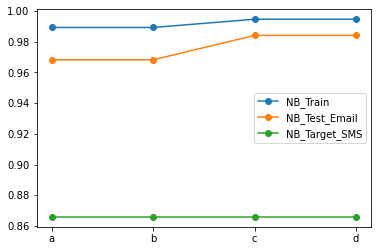

In [608]:
from matplotlib import pyplot
#values = [i for i in range(1,5)]
abc = ["a","b","c","d"]
values = [i for i in abc]
NB_train_scores = [0.98930,0.98930,0.99465,0.99465]
NB_test_scores = [0.96825,0.96825,0.98413,0.98413]
NB_target_scores = [0.86594,0.86594,0.86594,0.86594]
pyplot.plot(values, NB_train_scores, '-o', label='NB_Train')
pyplot.plot(values, NB_test_scores, '-o', label='NB_Test_Email')
pyplot.plot(values, NB_target_scores, '-o', label='NB_Target_SMS')

pyplot.legend()
pyplot.show()

In [609]:
conf_mat = confusion_matrix(Y_target, Y_test_pred)
print(conf_mat)

[[4825    0]
 [ 747    0]]
